In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers, models

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

2024-12-05 19:24:52.935140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733455492.955290  272110 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733455492.961598  272110 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 19:24:52.982613: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning:

In [2]:
print(tf.keras.__version__)
print(tf.__version__)

3.7.0
2.18.0


In [3]:
# Define the directories to the datasets

train_dir = 'data/train/train'
test_dir = 'data/test/test'
validation_dir = 'data/validation/validation'

# Inception

In [4]:
# Define image size and batch size
epochs = 30
image_size = (569, 479)
batch_size = 64

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=image_size,
    batch_size=batch_size
)

# Optional: Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 22348 files belonging to 22 classes.


2024-12-05 19:24:59.482707: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1733455499.484108  272110 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16422 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2024-12-05 19:24:59.484654: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1733455499.485924  272110 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7915 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 4800 files belonging to 22 classes.


In [5]:
%%time

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(569, 479, 3)) 

# Un-Freeze base layers
for layer in base_model.layers:
    layer.trainable = True

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(22, activation='softmax')(x) 

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset) 

Epoch 1/30


I0000 00:00:1733455525.461926  272587 service.cc:148] XLA service 0x7fd040029030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733455525.461953  272587 service.cc:156]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
I0000 00:00:1733455525.461956  272587 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-12-05 19:25:27.356460: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733455530.722768  272587 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 19:25:32.870480: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22723', 12 bytes spill stores, 12 bytes spill loads

2024-12-05 19:25:32.887867: I external/local_xla/xla/stream_executor

349/350 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.7934 - loss: 0.7431

2024-12-05 19:27:58.086544: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22723', 56 bytes spill stores, 56 bytes spill loads



350/350 ━━━━━━━━━━━━━━━━━━━━ 209s 362ms/step - accuracy: 0.7939 - loss: 0.7414 - val_accuracy: 0.7408 - val_loss: 1.0832
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 93s 267ms/step - accuracy: 0.9301 - loss: 0.2314 - val_accuracy: 0.9185 - val_loss: 0.2631
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 95s 272ms/step - accuracy: 0.9427 - loss: 0.1832 - val_accuracy: 0.8898 - val_loss: 0.3614
Epoch 4/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.9475 - loss: 0.1821 - val_accuracy: 0.9069 - val_loss: 0.3562
Epoch 5/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.9573 - loss: 0.1407 - val_accuracy: 0.8519 - val_loss: 0.6666
Epoch 6/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.9469 - loss: 0.1750 - val_accuracy: 0.9473 - val_loss: 0.1857
Epoch 7/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.9684 - loss: 0.1029 - val_accuracy: 0.9373 - val_loss: 0.2313
Epoch 8/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 94s 268ms/step - accuracy: 0.9714 - loss: 0.0936 - va

In [6]:
model.save(f"model_traineverything_tf_epoch{epochs}_batch{batch_size}.keras")

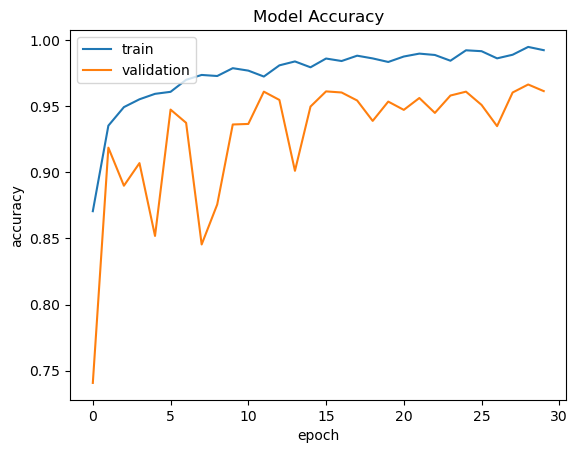

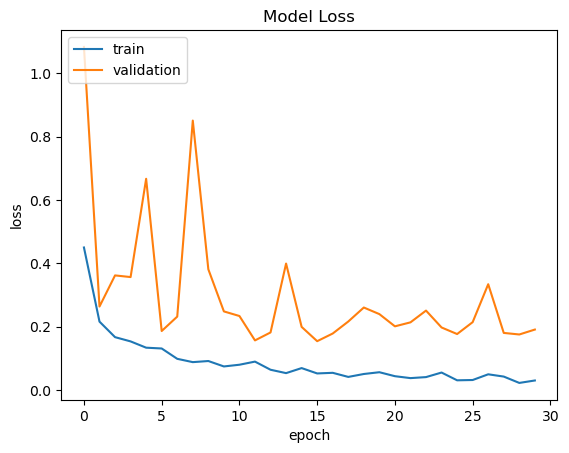

In [7]:
# Plot accuracy during training


plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model.history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(f'model_accuracy_traineverything_tf_epoch{epochs}_batch{batch_size}.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot loss during training

plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(f'model_loss_traineverything_tf_epoch{epochs}_batch{batch_size}.png', dpi=300, bbox_inches='tight')
plt.show()